In [25]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [26]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
data_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [27]:
# Review the df info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [28]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = data_df['loan_status']

# Separate the X variable, the features
X = data_df.drop('loan_status', axis=1)



In [29]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [30]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [31]:
# Check the balance of our target values
# Count the number of instances for each class in the target variable
value_counts = y.value_counts()
value_counts

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [32]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [33]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [34]:
# Make a prediction using the testing data 
y_pred = model.predict(X_test)


# Save the predictions on the testing data labels
y_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
y_pred_df


,y_test,y_pred
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
30965,0,1
30996,0,0
69036,0,0
23886,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [35]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.9921975754449317


In [36]:
# calculate the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# print the balanced accuracy score
print("Balanced accuracy score:", balanced_accuracy)

Balanced accuracy score: 0.9521352751368186


In [37]:
# Generate a confusion matrix for the model
confusion_mat = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print("Confusion matrix:")
print(confusion_mat)

Confusion matrix:
[[14926    75]
 [   46   461]]


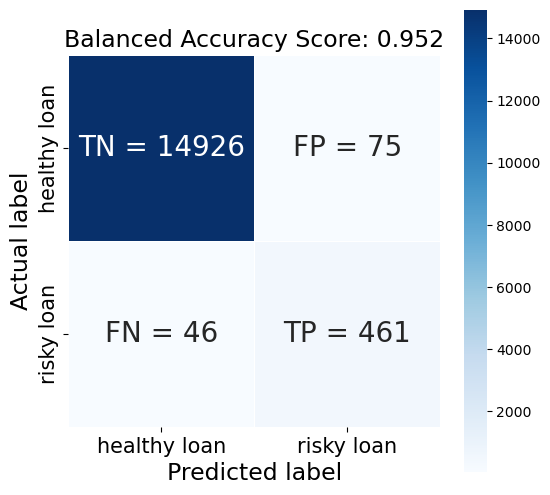

In [47]:
# Create a list to store the TN, FP, FN, and TP values for plotting
modified_cm = []
for index,value in enumerate(confusion_mat):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

# Plot a confusion matrix head map
plt.figure(figsize=(6,6))
sns.heatmap(confusion_mat, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['healthy loan', 'risky loan'],
            yticklabels = ['healthy loan', 'risky loan'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Balanced Accuracy Score: {:.3f}'.format(balanced_accuracy), size = 17);
plt.tick_params(labelsize= 15)

In [39]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)

# print the classification report
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
The precision is the ratio of true positives to the total number of predicted positives. For class 0, the precision is 1.00, which means that all of the instances that were predicted as belonging to class 0 (healthy loans) were actually members of that class. For class 1, the precision is 0.86, which means that 86% of the instances that were predicted as belonging to class 1 (risky loans) were actually members of that class.

The recall is the ratio of true positives to the total number of actual positives. For class 0, the recall is 1.00, which means that all of the instances that actually belonged to class 0 were correctly identified by the model. For class 1, the recall is 0.91, which means that 91% of the instances that actually belonged to class 1 were correctly identified by the model.

The F1 score is the harmonic mean of precision and recall, and is a combined measure of precision and recall. For class 0, the F1 score is 1.00, which indicates high performance. For class 1, the F1 score is 0.88, which indicates that the model is not performing as well on this class compared to class 0.


---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [40]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(sampling_strategy='auto', random_state=1)


# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)



In [41]:
# Count the distinct values of the resampled labels data
print("Original training data: ", y_train.value_counts())
print("Resampled training data: ", pd.Series(y_train_resampled).value_counts())

Original training data:  0    60035
1     1993
Name: loan_status, dtype: int64
Resampled training data:  0    60035
1    60035
Name: loan_status, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [42]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_os = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Fit the model using the resampled training data
model_os.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred = model_os.predict(X_test)



### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [43]:
# Calculate the balanced accuracy score
balanced_accuracy_os = balanced_accuracy_score(y_test, y_pred)

# Print the balanced accuracy score
print("Balanced accuracy score:", balanced_accuracy_os)

Balanced accuracy score: 0.9941749445500477


In [44]:
# Generate a confusion matrix for the model
confusion_mat_os = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print("Confusion matrix:")
print(confusion_mat_os)

Confusion matrix:
[[14915    86]
 [    3   504]]


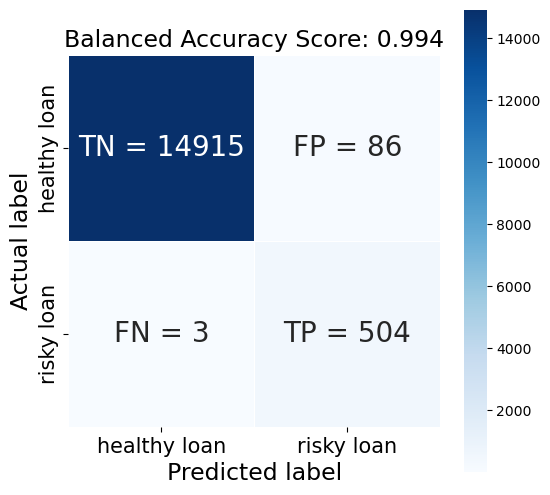

In [48]:
# Create a list to store the TN, FP, FN, and TP values for plotting
modified_cm_os = []
for index,value in enumerate(confusion_mat_os):
    if index == 0:
        modified_cm_os.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm_os.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

# Plot a confusion matrix head map
plt.figure(figsize=(6,6))
sns.heatmap(confusion_mat_os, annot=np.array(modified_cm_os),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['healthy loan', 'risky loan'],
            yticklabels = ['healthy loan', 'risky loan'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Balanced Accuracy Score: {:.3f}'.format(balanced_accuracy_os), size = 17);
plt.tick_params(labelsize= 15)

In [45]:
# Print the classification report for the model
class_report_os = classification_report(y_test, y_pred)

# print the classification report
print("Classification report:")
print(class_report_os)


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!